1. 导入模块将wav无损音频分离到audio文件夹中

In [2]:
import os
from tqdm import tqdm, trange
import time
from moviepy.editor import *
video_path="./video"
audio_path="./audio"

In [3]:
video_list=os.listdir(video_path)
for file in tqdm((video_list),desc='processing'):
    if('.mp4' in file):
        video = VideoFileClip(video_path+"/"+file)
        audio = video.audio
        #print(file.replace(".mp4", ".wav"))
        (audio.write_audiofile(audio_path+'/'+file.replace(".mp4", ".wav")))

processing: 100%|██████████| 20/20 [00:11<00:00,  1.69it/s]         


MoviePy - Writing audio in ./audio/gBR_sBM_c01_d04_mBR1_ch06.wav
MoviePy - Done.
MoviePy - Writing audio in ./audio/gBR_sBM_c01_d04_mBR0_ch06.wav
MoviePy - Done.
MoviePy - Writing audio in ./audio/gBR_sBM_c01_d04_mBR0_ch07.wav
MoviePy - Done.
MoviePy - Writing audio in ./audio/gBR_sBM_c01_d04_mBR1_ch07.wav
MoviePy - Done.
MoviePy - Writing audio in ./audio/gBR_sBM_c01_d04_mBR0_ch05.wav
MoviePy - Done.
MoviePy - Writing audio in ./audio/gBR_sBM_c01_d04_mBR1_ch05.wav
MoviePy - Done.
MoviePy - Writing audio in ./audio/gBR_sBM_c01_d04_mBR0_ch10.wav
MoviePy - Done.
MoviePy - Writing audio in ./audio/gBR_sBM_c01_d04_mBR1_ch04.wav
MoviePy - Done.
MoviePy - Writing audio in ./audio/gBR_sBM_c01_d04_mBR1_ch10.wav
MoviePy - Done.
MoviePy - Writing audio in ./audio/gBR_sBM_c01_d04_mBR0_ch04.wav
MoviePy - Done.
MoviePy - Writing audio in ./audio/gBR_sBM_c01_d04_mBR1_ch01.wav
MoviePy - Done.
MoviePy - Writing audio in ./audio/gBR_sBM_c01_d04_mBR0_ch01.wav
MoviePy - Done.
MoviePy - Writing audio in .

2.使用librosa进行音频处理
2.1 120帧的video和240帧的audio

In [36]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import torch
import numpy as np
from sklearn import preprocessing

processing audio:   0%|          | 0/20 [00:00<?, ?it/s]


tempo 105.88235294117646 
beat_frames [  2  36  70 103 137 171]


ParameterError: Audio data must be floating-point

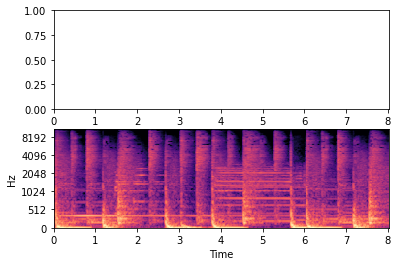

In [52]:
for audiofile in tqdm(os.listdir(audio_path),desc="processing audio"):
    envelop = audiofile
    start=0
    duration = 4
    stop = start + duration
    y,sr=librosa.load(audio_path+"/"+audiofile,sr=None,offset = start, duration = duration)#sr是采样率,None指原生采样率

    audio_duration = librosa.get_duration(y,sr)


    audio_dist = y[start*sr:stop*sr]
    frame_shift = duration/240#帧长
    frame_length = 0.03125#帧移
    hop_length =int(duration * sr / 240) #frame_shift * sr
    win_length = int(frame_length*sr)
    '''
    plt.figure()
    librosa.display.waveplot(audio_dist,sr)
    #librosa.display.waveplot(audio_dist,sr)
    '''
    mfccs=librosa.feature.mfcc(y=audio_dist,sr=sr,n_mfcc=20)
    chroma=librosa.feature.chroma_stft(audio_dist,sr=sr,hop_length=hop_length,win_length=win_length,n_chroma=12)

    oneset_env = librosa.onset.onset_strength(y=audio_dist,sr=sr,hop_length=hop_length,aggregate=np.median)
    peak = librosa.util.peak_pick(oneset_env,1,1,1,1,0.8,5)#公式来决定的，具体参数最后两个比较重要，后面需要调整
    tempo,beats = librosa.beat.beat_track(y=audio_dist,sr=sr,hop_length=hop_length)
    print("tempo",tempo, "\nbeat_frames",beats)
    librosa.clicks(frames=beats,sr=sr)

    '''
    # Display click waveform next to the spectrogram
    plt.figure()
    S = librosa.feature.melspectrogram(y=audio_dist, sr=sr)
    ax = plt.subplot(2,1,2)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                             x_axis='time', y_axis='mel')
    plt.subplot(2,1,1, sharex=ax)
    librosa.display.waveplot(beats, sr=sr, label='Beat clicks')
    plt.legend()
    plt.xlim(15, 30)
    plt.tight_layout()
    '''
    break



In [6]:
print(os.getcwd())

/Users/zhanchao/GitHub/3DMotionGenerator/Dataset/aist_plusplus_final
